In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
from google.colab import drive
from google.colab import files
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb

In [2]:
drive.mount('/content/drive')
train =  pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/ML Lab2/train.csv')
test =  pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/ML Lab2/test.csv')
train.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(360336, 17)

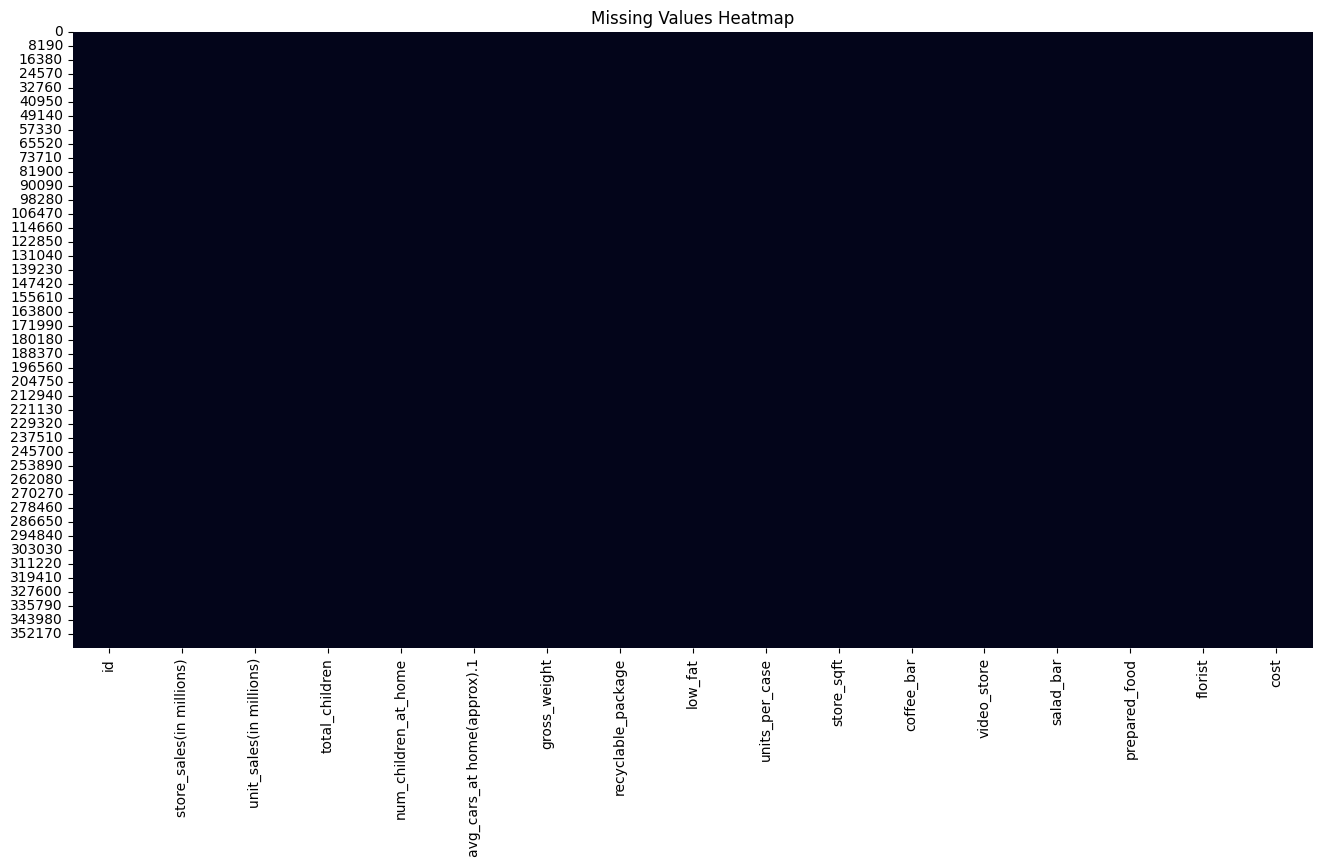

In [3]:
train.head
missing_matrix = train.isnull()
# Create a heatmap using seaborn
plt.figure(figsize=(16, 8))
sns.heatmap(missing_matrix, cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

missing_counts = train.isnull().sum()
for column, count in missing_counts.items():
    if(count>0):
      print(f"Column '{column}': {count} missing values")

No missing values

In [4]:
# Separate features and labels
X_train = train.drop(['id','cost'], axis=1)
y_train = train[['cost']]
X_test = test.drop(['id'], axis=1)

In [ ]:
X_train.head

<bound method NDFrame.head of         store_sales(in millions)  unit_sales(in millions)  total_children  \
0                           8.61                      3.0             2.0   
1                           5.00                      2.0             4.0   
2                          14.08                      4.0             0.0   
3                           4.02                      3.0             5.0   
4                           2.13                      3.0             5.0   
...                          ...                      ...             ...   
360331                      7.60                      4.0             5.0   
360332                     14.44                      4.0             4.0   
360333                     10.74                      3.0             0.0   
360334                     11.04                      3.0             1.0   
360335                      5.30                      2.0             2.0   

        num_children_at_home  avg_cars_at hom

In [ ]:
X_test.head

<bound method NDFrame.head of         store_sales(in millions)  unit_sales(in millions)  total_children  \
0                           7.24                      4.0             1.0   
1                           6.90                      2.0             2.0   
2                           8.34                      3.0             0.0   
3                           5.48                      2.0             3.0   
4                           4.80                      3.0             2.0   
...                          ...                      ...             ...   
240219                      8.60                      4.0             0.0   
240220                      4.30                      2.0             2.0   
240221                      6.30                      3.0             0.0   
240222                      7.94                      2.0             0.0   
240223                      7.56                      3.0             1.0   

        num_children_at_home  avg_cars_at hom

In [5]:
X_train['store_sqft'] = X_train['store_sqft'].astype('category')
X_train['salad'] = (X_train['salad_bar'] + X_train['prepared_food']) / 2

X_test['store_sqft'] = X_test['store_sqft'].astype('category')
X_test['salad'] = (X_test['salad_bar'] + X_test['prepared_food']) / 2

In [6]:
y_train['cost'] = np.log1p(y_train['cost'])
y_train

,cost
0,4.144562
1,4.810557
2,4.436870
3,4.216267
4,4.723042
...,...
360331,4.900969
360332,4.417032
360333,4.478132
360334,4.995319


In [7]:
most_important_features = ['total_children', 'num_children_at_home',
                           'avg_cars_at home(approx).1', 'store_sqft',
                           'coffee_bar', 'video_store', 'salad',
                           'florist']
X_train_after_fr = X_train[most_important_features]
X_test_after_fr = X_test[most_important_features]

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_after_fr)
X_test_scaled = scaler.transform(X_test_after_fr)

In [31]:
from sklearn.metrics import mean_squared_error

def rmsle_scorer(y_true, y_pred):
  """RMSLE scorer function."""
  return (mean_squared_error(y_true, y_pred, squared=False))

In [34]:
from sklearn.model_selection import GridSearchCV

def model_hyperparameter_tuning(model, params, X_t, y_t):
  #hyper parameter tuning
  model_cv=GridSearchCV(estimator=model, param_grid=params,scoring ='neg_mean_squared_error')
  model_cv.fit(X_t,y_t)
  return model_cv.best_params_


In [29]:
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score

def check_model_accuracy_rmse(model,X_t, y_t):
  #Cross Validation
  rmse_cv = cross_val_score(model, X_t, y_t, cv=3, scoring = rmsle_scorer).mean()
  print("RMSLE from cross validation trainig",rmse_cv)


In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def split_for_accuracy(model,X_t, y_t):
  X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=1000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred, squared=False)
  print(f"Root Mean Squared Log Error: {mse:.2f}")


In [8]:
print("X :",X_train_scaled)
print("Y :",y_train['cost'])

X : [[-0.30657179  1.07893054 -0.1879684  ... -0.61958032 -1.00972576
  -1.00640343]
 [ 1.03662073 -0.56752486  0.73429274 ... -0.61958032 -1.00972576
  -1.00640343]
 [-1.64976431 -0.56752486  0.73429274 ... -0.61958032 -1.00972576
  -1.00640343]
 ...
 [-1.64976431 -0.56752486 -0.1879684  ...  1.61399574  0.99044764
   0.99363731]
 [-0.97816805 -0.56752486  0.73429274 ...  1.61399574  0.99044764
   0.99363731]
 [-0.30657179 -0.56752486 -0.1879684  ... -0.61958032  0.99044764
   0.99363731]]
Y : 0         4.144562
1         4.810557
2         4.436870
3         4.216267
4         4.723042
            ...   
360331    4.900969
360332    4.417032
360333    4.478132
360334    4.995319
360335    4.815998
Name: cost, Length: 360336, dtype: float64


In [35]:
# Create an instance of the GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid_gbr = {
    "learning_rate": [0.005, 0.01],
    "n_estimators": [50,100],
    "subsample": [0.8, 0.9, 1.0],
    "max_depth": [3, 5, 7, 25],
}

best_params_gbr= model_hyperparameter_tuning(gbr,param_grid_gbr,X_train_scaled,y_train['cost'])
print(best_params_gbr)

{'learning_rate': 0.01, 'max_depth': 25, 'n_estimators': 100, 'subsample': 0.8}


In [36]:
#crossvalidation for gbr
gbr1= GradientBoostingRegressor(random_state=42, **best_params_gbr)
check_model_accuracy_rmse(gbr1,X_train_scaled,y_train['cost'])

RMSLE from cross validation trainig nan


In [37]:
#crossvalidation for gbr
gbr1= GradientBoostingRegressor(random_state=42, **best_params_gbr)
split_for_accuracy(gbr1,X_train_scaled,y_train['cost'])

Root Mean Squared Log Error: 0.30


In [43]:
# Create the LightGBM model
lgb_model = lgb.LGBMRegressor()

# Define the hyperparameter grid
param_grid_lgb = {
    "learning_rate": [0.01,0.1],
    "n_estimators": [50, 100, 200,],
    "num_leaves": [31, 63, 127],
}

best_params_lgb= model_hyperparameter_tuning(lgb_model,param_grid_lgb,X_train_scaled,y_train['cost'])
print(best_params_lgb)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 288268, number of used features: 8
[LightGBM] [Info] Start training from score 4.563347
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 288269, number of used features: 8
[LightGBM] [Info] Start training from score 4.563211
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not 

In [44]:
#crossvalidation for lgb
lgb1= lgb.LGBMRegressor( **best_params_lgb)
split_for_accuracy(lgb1,X_train_scaled,y_train['cost'])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 288268, number of used features: 8
[LightGBM] [Info] Start training from score 4.563621
Root Mean Squared Log Error: 0.29


Since we get a lower root mean sqaure from lightgbm model than from GradientBoost we use light gbm model for prediction

In [49]:
#Predicting values for test set
best_param= {
    "learning_rate": 0.1,
    "n_estimators": 200,
    "num_leaves": 127
}
test_lgb= lgb.LGBMRegressor( **best_param)
prediction_y = test_lgb.fit(X_train_scaled,y_train['cost']).predict(X_test_scaled)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 54
[LightGBM] [Info] Number of data points in the train set: 360336, number of used features: 8
[LightGBM] [Info] Start training from score 4.563348


In [51]:
output_df = test[['id']]
output_df['cost'] =np.expm1(prediction_y)
output_df.head()


,id,cost
0,360336,90.766287
1,360337,93.876864
2,360338,93.998323
3,360339,99.222650
4,360340,77.992342


In [53]:
#Output file download

output_df.to_csv('LightGBM_prediction_lab2.csv', index=False)
files.download('LightGBM_prediction_lab2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
#Test prediction from gradient boost

best_param_gbr = {
    "learning_rate": 0.01,
    "n_estimators": 100,
    "subsample": 0.8,
    "max_depth": 25,
}

test_gbr= GradientBoostingRegressor(random_state=42, **best_param_gbr)
prediction_y_gbr = test_gbr.fit(X_train_scaled,y_train['cost']).predict(X_test_scaled)

#Output
output_df_gbr = test[['id']]
output_df_gbr['cost'] =np.expm1(prediction_y_gbr)
output_df_gbr.head()


,id,cost
0,360336,92.038813
1,360337,94.484457
2,360338,94.484554
3,360339,98.099704
4,360340,83.976905


In [55]:
#Output file download

output_df_gbr.to_csv('GBR_prediction_lab2.csv', index=False)
files.download('GBR_prediction_lab2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>